## Arima Exercise

In [74]:
# import libraries
import numpy as np
from numpy import sqrt
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
# load data
df = pd.read_csv('https://raw.githubusercontent.com/AileenNielsen/TimeSeriesAnalysisWithPython/master/data/AirPassengers.csv',
                 parse_dates = ['Month'], 
                 index_col = ['Month'])\
       .rename(columns={'#Passengers':'Passengers'})

**Task:** Print the top 5 rows.

In [12]:
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


**Task:** Create the function called `plot_timeseries(df)`.

In [6]:
def plot_timeseries(df):
    plt.plot(df)
    plt.show()

**Task:** Plot the time series from above.

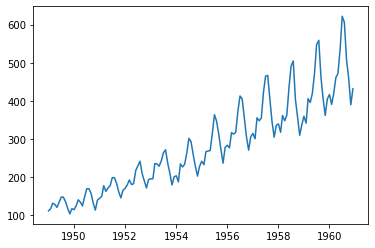

In [7]:
plot_timeseries(df)

**Task:** Compute the rolling mean and the rolling std with an appropriate window size.

In [15]:
rolling = df.rolling(window = 5)
rolling_mean = rolling.mean()
rolling_std = rolling.std()

In [16]:
rolling_mean

,Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,122.4
...,...
1960-08-01,539.2
1960-09-01,548.6
1960-10-01,546.4


**Task:** Plot the two time series:
- with rolling mean 
- with rolling std

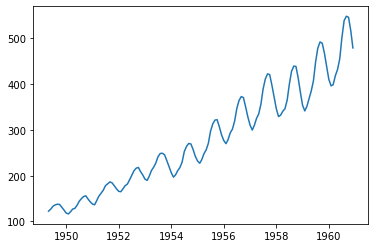

In [17]:
plot_timeseries(rolling_mean)

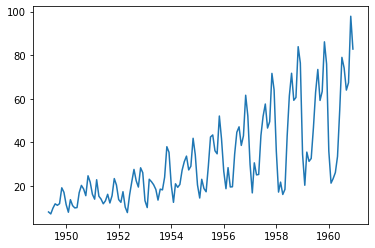

In [18]:
plot_timeseries(rolling_std)

In [29]:
rolling_mean = rolling_mean.fillna(0)
rolling_std = rolling_std.fillna(0)

**Task:** Test the stationarity of all the time series

In [30]:
#null hypothesis

def ADF_Stationarity_Test(timeseries, significance_level):
    result = adfuller(timeseries, store = True)
    if result[1]>significance_level:
        print("Pvalue {} is over sig level {}, fail to reject null hypothesis that time series is non stationary.".format(result[1],significance_level))
    else:
        print("Pvalue {} is under sig level {}, reject null hypothesis that timeseries is non stationary.".format(result[1],significance_level))

In [31]:
ADF_Stationarity_Test(rolling_mean, 0.05)

Pvalue 0.9986804320004908 is over sig level 0.05, fail to reject null hypothesis that time series is non stationary.


In [32]:
ADF_Stationarity_Test(rolling_std, 0.05)

Pvalue 0.9738867560243121 is over sig level 0.05, fail to reject null hypothesis that time series is non stationary.


In [36]:
ADF_Stationarity_Test(df, 0.05)

Pvalue 0.991880243437641 is over sig level 0.05, fail to reject null hypothesis that time series is non stationary.


**Task:** Perform a log transformation on the original time series. 

In [22]:
y = np.log(df)

**Task:** Plot the transformed time series.

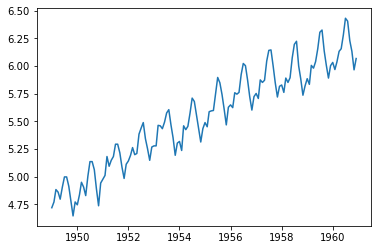

In [33]:
plot_timeseries(y)

**Task:** Test the stationarity of the transformed time series. If it isn't stationary, try a different transformation technique. 

In [34]:
ADF_Stationarity_Test(y, 0.05)

Pvalue 0.4223667747703911 is over sig level 0.05, fail to reject null hypothesis that time series is non stationary.


In [45]:
#square root and difference between t and t-1, convert non-stationary to stationary
df_sqrt=np.sqrt(df['Passengers']) 
df_diff=df_sqrt.diff().dropna()

In [47]:
ADF_Stationarity_Test(df_diff, 0.05)

Pvalue 0.02078418557126726 is under sig level 0.05, reject null hypothesis that timeseries is non stationary.


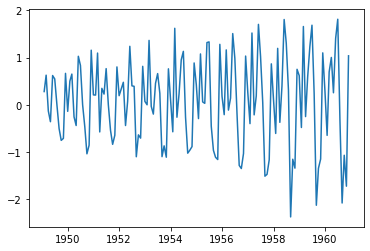

In [48]:
plot_timeseries(df_diff)

**Task:** Use the stationary time series and find the optimal `(p, d, q)` parameters of ARIMA model.

In [49]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

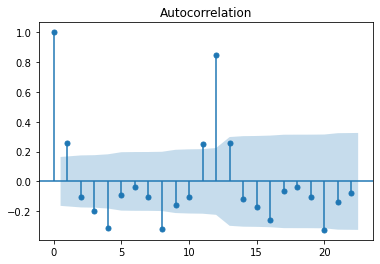

In [52]:
plot_acf(df_diff)
plt.show()

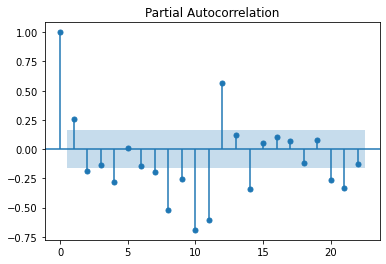

In [53]:
plot_pacf(df_diff)
plt.show()

**Task:** Plot the predictions (not transformed to the original scale).

In [54]:
from sklearn import metrics
from statsmodels.tsa.arima.model import ARIMA


C:\Users\bevli\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\bevli\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS wi

                             ARIMA Model Results                              
Dep. Variable:           D.Passengers   No. Observations:                  143
Model:                 ARIMA(2, 1, 3)   Log Likelihood                -664.639
Method:                       css-mle   S.D. of innovations             24.516
Date:                Mon, 25 Jul 2022   AIC                           1343.278
Time:                        20:58:51   BIC                           1364.018
Sample:                    02-01-1949   HQIC                          1351.706
                         - 12-01-1960                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  2.5677      0.821      3.126      0.002       0.958       4.177
ar.L1.D.Passengers     1.6117      0.045     35.755      0.000       1.523       1.700
ar.L2.D.Passengers  

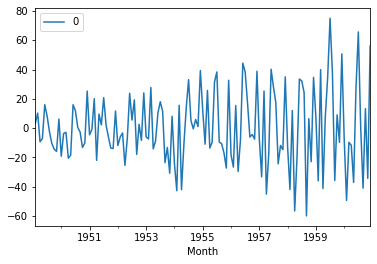

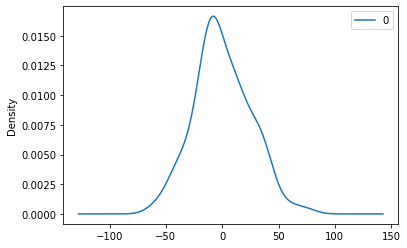

                0
count  143.000000
mean     0.325978
std     24.931666
min    -59.969319
25%    -14.025977
50%     -3.284760
75%     16.042318
max     75.117414


In [61]:
# fit model
model = ARIMA(df, order=(2,1,3))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
# density plot of residuals
residuals.plot(kind='kde')
plt.show()
# summary stats of residuals
print(residuals.describe())

**Task:** Plot the predictions (transformed to the original scale).

C:\Users\bevli\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\bevli\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS wi

                             ARIMA Model Results                              
Dep. Variable:           D.Passengers   No. Observations:                  143
Model:                 ARIMA(2, 1, 3)   Log Likelihood                 149.036
Method:                       css-mle   S.D. of innovations              0.084
Date:                Mon, 25 Jul 2022   AIC                           -284.072
Time:                        20:59:05   BIC                           -263.332
Sample:                    02-01-1949   HQIC                          -275.644
                         - 12-01-1960                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0100      0.002      6.101      0.000       0.007       0.013
ar.L1.D.Passengers     1.5594      0.070     22.340      0.000       1.423       1.696
ar.L2.D.Passengers  

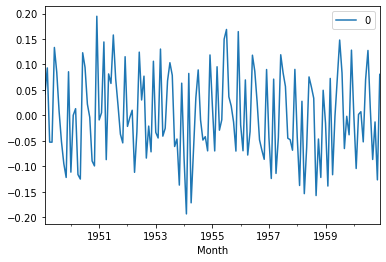

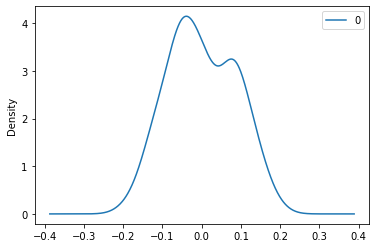

                0
count  143.000000
mean     0.000782
std      0.085420
min     -0.193175
25%     -0.064052
50%     -0.003975
75%      0.074134
max      0.194618


In [62]:
# fit model
model = ARIMA(y, order=(2,1,3))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
# density plot of residuals
residuals.plot(kind='kde')
plt.show()
# summary stats of residuals
print(residuals.describe())

**Task:** Plot the predictions for the next 10 years. How accurate do you think your model is predicting that far in the future? 

C:\Users\bevli\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


predicted=274.718153, expected=306.000000
predicted=332.360379, expected=315.000000
predicted=343.640727, expected=301.000000
predicted=312.318446, expected=356.000000
predicted=369.395976, expected=348.000000
predicted=331.068354, expected=355.000000
predicted=367.903441, expected=422.000000
predicted=416.406506, expected=465.000000
predicted=444.255795, expected=467.000000
predicted=437.443226, expected=404.000000
predicted=370.654340, expected=347.000000
predicted=343.969298, expected=305.000000
predicted=294.902216, expected=336.000000
predicted=357.687482, expected=340.000000
predicted=361.304535, expected=318.000000
predicted=335.785772, expected=362.000000
predicted=379.796933, expected=348.000000
predicted=342.634811, expected=363.000000
predicted=382.503240, expected=435.000000
predicted=438.848999, expected=491.000000
predicted=477.152560, expected=505.000000
predicted=475.964286, expected=404.000000
predicted=350.138250, expected=359.000000
predicted=334.105198, expected=310

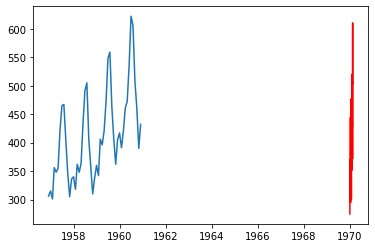

In [84]:
 from sklearn import metrics
# split into train and test sets
df_final = df['Passengers']
size = int(len(df) * 0.66)
train, test = df_final[0:size], df_final[size:len(df_final)]
history = [x for x in train]
predictions = list()

# walk-forward validation
for t in range(len(test)):
    model = ARIMA(history, order=(2,1,3))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

    # evaluate forecasts
rmse = sqrt(metrics.mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

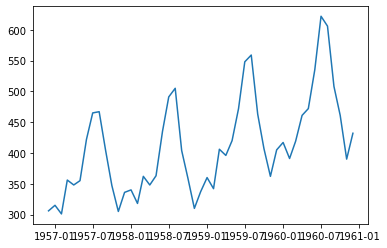

In [80]:
plt.plot(test)

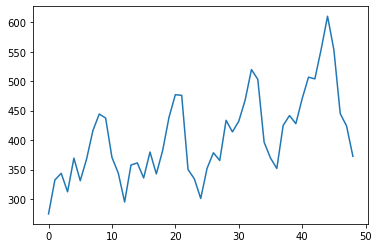

In [81]:
plt.plot(predictions)
